In [1]:
%%capture
%run 03_Model_RNN_BNN.ipynb

2022-06-21 08:34:22.374142: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-06-21 08:34:23.218488: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 17373 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:41:00.0, compute capability: 8.6
2022-06-21 08:34:23.219786: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 22302 MB memory:  -> device: 1, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:c1:00.0, compute capability: 8.6


In [2]:
BATCH_SIZE = 10

# Input pipeline

In [9]:
# prepare data generators using tf.data
train_dataset = (
    tf.data.Dataset.from_tensor_slices((z_train, mu_train))
    #.shuffle(TRAIN_LENGTH, reshuffle_each_iteration=True)
    .batch(BATCH_SIZE, drop_remainder=False)
);

#test_dataset = tf.data.Dataset.from_tensor_slices((z_test,mu_test)).batch(BATCH_SIZE);
val_dataset = (
    tf.data.Dataset.from_tensor_slices((z_val,mu_val))
    .batch(BATCH_SIZE, drop_remainder=False)
);

# Train

In [20]:
model = my_model(0.)

In [21]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(1e-3), 
    loss = tf.keras.losses.MeanSquaredError(), 
    metrics = tf.keras.metrics.RootMeanSquaredError())

In [22]:
# Create a callback that saves the model's weights
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    os.path.join(out_dir,'cp.ckpt'), 
    monitor='val_loss', 
    save_weights_only=True, 
    verbose=1, 
    save_best_only=True
    )

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.1, patience=10, verbose=1,
    mode='auto', min_delta=0.0001, cooldown=0, min_lr=1e-10
)

early_stopping = [
    tf.keras.callbacks.EarlyStopping(
        # Stop training when `val_loss` is no longer improving
        monitor="val_loss",
        # "no longer improving" being defined as "no better than 1e-2 less"
        min_delta=0,
        # "no longer improving" being further defined as "for at least 2 epochs"
        patience=5,
        verbose=1
    )
]
epochs = 1000
model_history = model.fit(train_dataset,
                          epochs = epochs,
                          validation_data = val_dataset,
                          callbacks = [checkpoint, early_stopping]
                          )

Epoch 1/1000
1/8 [==>...........................] - ETA: 17s - loss: 0.8706 - root_mean_squared_error: 0.9331
Epoch 00001: val_loss improved from inf to 0.88176, saving model to ../out/union/lstm/cp.ckpt
8/8 [==============================] - 3s 105ms/step - loss: 1.0229 - root_mean_squared_error: 1.0114 - val_loss: 0.8818 - val_root_mean_squared_error: 0.9390
Epoch 2/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.7868 - root_mean_squared_error: 0.8870
Epoch 00002: val_loss improved from 0.88176 to 0.76375, saving model to ../out/union/lstm/cp.ckpt
8/8 [==============================] - 0s 9ms/step - loss: 0.9078 - root_mean_squared_error: 0.9528 - val_loss: 0.7638 - val_root_mean_squared_error: 0.8739
Epoch 3/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.6849 - root_mean_squared_error: 0.8276
Epoch 00003: val_loss improved from 0.76375 to 0.66833, saving model to ../out/union/lstm/cp.ckpt
8/8 [==============================] - 0s 10ms/step - loss: 0.7688

8/8 [==============================] - 0s 9ms/step - loss: 0.1132 - root_mean_squared_error: 0.3365 - val_loss: 0.0984 - val_root_mean_squared_error: 0.3137
Epoch 24/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.1053 - root_mean_squared_error: 0.3244
Epoch 00024: val_loss improved from 0.09840 to 0.09270, saving model to ../out/union/lstm/cp.ckpt
8/8 [==============================] - 0s 9ms/step - loss: 0.1070 - root_mean_squared_error: 0.3271 - val_loss: 0.0927 - val_root_mean_squared_error: 0.3045
Epoch 25/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.0999 - root_mean_squared_error: 0.3161
Epoch 00025: val_loss improved from 0.09270 to 0.08733, saving model to ../out/union/lstm/cp.ckpt
8/8 [==============================] - 0s 9ms/step - loss: 0.1012 - root_mean_squared_error: 0.3182 - val_loss: 0.0873 - val_root_mean_squared_error: 0.2955
Epoch 26/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.0948 - root_mean_squared_error: 0.3079
Epo

Epoch 46/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.0499 - root_mean_squared_error: 0.2233
Epoch 00046: val_loss improved from 0.03590 to 0.03470, saving model to ../out/union/lstm/cp.ckpt
8/8 [==============================] - 0s 10ms/step - loss: 0.0398 - root_mean_squared_error: 0.1996 - val_loss: 0.0347 - val_root_mean_squared_error: 0.1863
Epoch 47/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.0487 - root_mean_squared_error: 0.2208
Epoch 00047: val_loss improved from 0.03470 to 0.03354, saving model to ../out/union/lstm/cp.ckpt
8/8 [==============================] - 0s 10ms/step - loss: 0.0384 - root_mean_squared_error: 0.1960 - val_loss: 0.0335 - val_root_mean_squared_error: 0.1831
Epoch 48/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.0476 - root_mean_squared_error: 0.2182
Epoch 00048: val_loss improved from 0.03354 to 0.03241, saving model to ../out/union/lstm/cp.ckpt
8/8 [==============================] - 0s 10ms/step - loss: 

Epoch 69/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.0311 - root_mean_squared_error: 0.1762
Epoch 00069: val_loss improved from 0.02044 to 0.02021, saving model to ../out/union/lstm/cp.ckpt
8/8 [==============================] - 0s 10ms/step - loss: 0.0220 - root_mean_squared_error: 0.1485 - val_loss: 0.0202 - val_root_mean_squared_error: 0.1422
Epoch 70/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.0306 - root_mean_squared_error: 0.1750
Epoch 00070: val_loss improved from 0.02021 to 0.02000, saving model to ../out/union/lstm/cp.ckpt
8/8 [==============================] - 0s 9ms/step - loss: 0.0218 - root_mean_squared_error: 0.1476 - val_loss: 0.0200 - val_root_mean_squared_error: 0.1414
Epoch 71/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.0302 - root_mean_squared_error: 0.1738
Epoch 00071: val_loss improved from 0.02000 to 0.01979, saving model to ../out/union/lstm/cp.ckpt
8/8 [==============================] - 0s 9ms/step - loss: 0.

Epoch 92/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.0248 - root_mean_squared_error: 0.1574
Epoch 00092: val_loss improved from 0.01671 to 0.01658, saving model to ../out/union/lstm/cp.ckpt
8/8 [==============================] - 0s 9ms/step - loss: 0.0179 - root_mean_squared_error: 0.1337 - val_loss: 0.0166 - val_root_mean_squared_error: 0.1288
Epoch 93/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.0246 - root_mean_squared_error: 0.1568
Epoch 00093: val_loss improved from 0.01658 to 0.01645, saving model to ../out/union/lstm/cp.ckpt
8/8 [==============================] - 0s 9ms/step - loss: 0.0177 - root_mean_squared_error: 0.1332 - val_loss: 0.0165 - val_root_mean_squared_error: 0.1283
Epoch 94/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.0244 - root_mean_squared_error: 0.1563
Epoch 00094: val_loss improved from 0.01645 to 0.01633, saving model to ../out/union/lstm/cp.ckpt
8/8 [==============================] - 0s 10ms/step - loss: 0.

Epoch 115/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.0211 - root_mean_squared_error: 0.1451
Epoch 00115: val_loss improved from 0.01400 to 0.01389, saving model to ../out/union/lstm/cp.ckpt
8/8 [==============================] - 0s 10ms/step - loss: 0.0149 - root_mean_squared_error: 0.1219 - val_loss: 0.0139 - val_root_mean_squared_error: 0.1178
Epoch 116/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.0209 - root_mean_squared_error: 0.1446
Epoch 00116: val_loss improved from 0.01389 to 0.01378, saving model to ../out/union/lstm/cp.ckpt
8/8 [==============================] - 0s 12ms/step - loss: 0.0147 - root_mean_squared_error: 0.1214 - val_loss: 0.0138 - val_root_mean_squared_error: 0.1174
Epoch 117/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.0208 - root_mean_squared_error: 0.1441
Epoch 00117: val_loss improved from 0.01378 to 0.01367, saving model to ../out/union/lstm/cp.ckpt
8/8 [==============================] - 0s 9ms/step - loss

Epoch 138/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.0177 - root_mean_squared_error: 0.1330
Epoch 00138: val_loss improved from 0.01173 to 0.01165, saving model to ../out/union/lstm/cp.ckpt
8/8 [==============================] - 0s 9ms/step - loss: 0.0124 - root_mean_squared_error: 0.1113 - val_loss: 0.0116 - val_root_mean_squared_error: 0.1079
Epoch 139/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.0176 - root_mean_squared_error: 0.1325
Epoch 00139: val_loss improved from 0.01165 to 0.01156, saving model to ../out/union/lstm/cp.ckpt
8/8 [==============================] - 0s 9ms/step - loss: 0.0123 - root_mean_squared_error: 0.1109 - val_loss: 0.0116 - val_root_mean_squared_error: 0.1075
Epoch 140/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.0174 - root_mean_squared_error: 0.1320
Epoch 00140: val_loss improved from 0.01156 to 0.01147, saving model to ../out/union/lstm/cp.ckpt
8/8 [==============================] - 0s 9ms/step - loss: 

Epoch 161/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.0148 - root_mean_squared_error: 0.1218
Epoch 00161: val_loss improved from 0.01003 to 0.00997, saving model to ../out/union/lstm/cp.ckpt
8/8 [==============================] - 0s 10ms/step - loss: 0.0106 - root_mean_squared_error: 0.1032 - val_loss: 0.0100 - val_root_mean_squared_error: 0.0998
Epoch 162/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.0147 - root_mean_squared_error: 0.1214
Epoch 00162: val_loss improved from 0.00997 to 0.00991, saving model to ../out/union/lstm/cp.ckpt
8/8 [==============================] - 0s 9ms/step - loss: 0.0106 - root_mean_squared_error: 0.1029 - val_loss: 0.0099 - val_root_mean_squared_error: 0.0996
Epoch 163/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.0146 - root_mean_squared_error: 0.1209
Epoch 00163: val_loss improved from 0.00991 to 0.00986, saving model to ../out/union/lstm/cp.ckpt
8/8 [==============================] - 0s 9ms/step - loss:

Epoch 184/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.0128 - root_mean_squared_error: 0.1131
Epoch 00184: val_loss improved from 0.00901 to 0.00898, saving model to ../out/union/lstm/cp.ckpt
8/8 [==============================] - 0s 9ms/step - loss: 0.0095 - root_mean_squared_error: 0.0975 - val_loss: 0.0090 - val_root_mean_squared_error: 0.0948
Epoch 185/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.0127 - root_mean_squared_error: 0.1128
Epoch 00185: val_loss improved from 0.00898 to 0.00895, saving model to ../out/union/lstm/cp.ckpt
8/8 [==============================] - 0s 9ms/step - loss: 0.0095 - root_mean_squared_error: 0.0973 - val_loss: 0.0089 - val_root_mean_squared_error: 0.0946
Epoch 186/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.0126 - root_mean_squared_error: 0.1125
Epoch 00186: val_loss improved from 0.00895 to 0.00892, saving model to ../out/union/lstm/cp.ckpt
8/8 [==============================] - 0s 9ms/step - loss: 

Epoch 207/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.0114 - root_mean_squared_error: 0.1070
Epoch 00207: val_loss improved from 0.00845 to 0.00843, saving model to ../out/union/lstm/cp.ckpt
8/8 [==============================] - 0s 10ms/step - loss: 0.0087 - root_mean_squared_error: 0.0935 - val_loss: 0.0084 - val_root_mean_squared_error: 0.0918
Epoch 208/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.0114 - root_mean_squared_error: 0.1068
Epoch 00208: val_loss improved from 0.00843 to 0.00841, saving model to ../out/union/lstm/cp.ckpt
8/8 [==============================] - 0s 9ms/step - loss: 0.0087 - root_mean_squared_error: 0.0934 - val_loss: 0.0084 - val_root_mean_squared_error: 0.0917
Epoch 209/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.0114 - root_mean_squared_error: 0.1065
Epoch 00209: val_loss improved from 0.00841 to 0.00840, saving model to ../out/union/lstm/cp.ckpt
8/8 [==============================] - 0s 10ms/step - loss

Epoch 230/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.0106 - root_mean_squared_error: 0.1031
Epoch 00230: val_loss improved from 0.00815 to 0.00814, saving model to ../out/union/lstm/cp.ckpt
8/8 [==============================] - 0s 9ms/step - loss: 0.0083 - root_mean_squared_error: 0.0909 - val_loss: 0.0081 - val_root_mean_squared_error: 0.0902
Epoch 231/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.0106 - root_mean_squared_error: 0.1030
Epoch 00231: val_loss improved from 0.00814 to 0.00813, saving model to ../out/union/lstm/cp.ckpt
8/8 [==============================] - 0s 9ms/step - loss: 0.0082 - root_mean_squared_error: 0.0908 - val_loss: 0.0081 - val_root_mean_squared_error: 0.0902
Epoch 232/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.0106 - root_mean_squared_error: 0.1028
Epoch 00232: val_loss improved from 0.00813 to 0.00812, saving model to ../out/union/lstm/cp.ckpt
8/8 [==============================] - 0s 9ms/step - loss: 

Epoch 253/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.0102 - root_mean_squared_error: 0.1008
Epoch 00253: val_loss improved from 0.00800 to 0.00800, saving model to ../out/union/lstm/cp.ckpt
8/8 [==============================] - 0s 9ms/step - loss: 0.0080 - root_mean_squared_error: 0.0892 - val_loss: 0.0080 - val_root_mean_squared_error: 0.0894
Epoch 254/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.0101 - root_mean_squared_error: 0.1007
Epoch 00254: val_loss improved from 0.00800 to 0.00799, saving model to ../out/union/lstm/cp.ckpt
8/8 [==============================] - 0s 10ms/step - loss: 0.0079 - root_mean_squared_error: 0.0891 - val_loss: 0.0080 - val_root_mean_squared_error: 0.0894
Epoch 255/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.0101 - root_mean_squared_error: 0.1006
Epoch 00255: val_loss improved from 0.00799 to 0.00799, saving model to ../out/union/lstm/cp.ckpt
8/8 [==============================] - 0s 10ms/step - loss

Epoch 276/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.0099 - root_mean_squared_error: 0.0993
Epoch 00276: val_loss improved from 0.00793 to 0.00793, saving model to ../out/union/lstm/cp.ckpt
8/8 [==============================] - 0s 10ms/step - loss: 0.0078 - root_mean_squared_error: 0.0881 - val_loss: 0.0079 - val_root_mean_squared_error: 0.0891
Epoch 277/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.0099 - root_mean_squared_error: 0.0993
Epoch 00277: val_loss improved from 0.00793 to 0.00793, saving model to ../out/union/lstm/cp.ckpt
8/8 [==============================] - 0s 10ms/step - loss: 0.0078 - root_mean_squared_error: 0.0880 - val_loss: 0.0079 - val_root_mean_squared_error: 0.0890
Epoch 278/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.0099 - root_mean_squared_error: 0.0993
Epoch 00278: val_loss improved from 0.00793 to 0.00793, saving model to ../out/union/lstm/cp.ckpt
8/8 [==============================] - 0s 9ms/step - loss

Epoch 299/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.0097 - root_mean_squared_error: 0.0984
Epoch 00299: val_loss improved from 0.00791 to 0.00791, saving model to ../out/union/lstm/cp.ckpt
8/8 [==============================] - 0s 10ms/step - loss: 0.0076 - root_mean_squared_error: 0.0873 - val_loss: 0.0079 - val_root_mean_squared_error: 0.0889
Epoch 300/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.0097 - root_mean_squared_error: 0.0984
Epoch 00300: val_loss improved from 0.00791 to 0.00791, saving model to ../out/union/lstm/cp.ckpt
8/8 [==============================] - 0s 10ms/step - loss: 0.0076 - root_mean_squared_error: 0.0873 - val_loss: 0.0079 - val_root_mean_squared_error: 0.0889
Epoch 301/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.0097 - root_mean_squared_error: 0.0984
Epoch 00301: val_loss improved from 0.00791 to 0.00790, saving model to ../out/union/lstm/cp.ckpt
8/8 [==============================] - 0s 9ms/step - loss

8/8 [==============================] - 0s 9ms/step - loss: 0.0075 - root_mean_squared_error: 0.0868 - val_loss: 0.0079 - val_root_mean_squared_error: 0.0889
Epoch 322/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.0096 - root_mean_squared_error: 0.0978
Epoch 00322: val_loss improved from 0.00790 to 0.00790, saving model to ../out/union/lstm/cp.ckpt
8/8 [==============================] - 0s 9ms/step - loss: 0.0075 - root_mean_squared_error: 0.0868 - val_loss: 0.0079 - val_root_mean_squared_error: 0.0889
Epoch 323/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.0096 - root_mean_squared_error: 0.0977
Epoch 00323: val_loss improved from 0.00790 to 0.00790, saving model to ../out/union/lstm/cp.ckpt
8/8 [==============================] - 0s 9ms/step - loss: 0.0075 - root_mean_squared_error: 0.0868 - val_loss: 0.0079 - val_root_mean_squared_error: 0.0889
Epoch 324/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.0095 - root_mean_squared_error: 0.0977


Epoch 344/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.0095 - root_mean_squared_error: 0.0973
Epoch 00344: val_loss improved from 0.00790 to 0.00790, saving model to ../out/union/lstm/cp.ckpt
8/8 [==============================] - 0s 10ms/step - loss: 0.0075 - root_mean_squared_error: 0.0864 - val_loss: 0.0079 - val_root_mean_squared_error: 0.0889
Epoch 345/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.0095 - root_mean_squared_error: 0.0972
Epoch 00345: val_loss improved from 0.00790 to 0.00790, saving model to ../out/union/lstm/cp.ckpt
8/8 [==============================] - 0s 9ms/step - loss: 0.0075 - root_mean_squared_error: 0.0864 - val_loss: 0.0079 - val_root_mean_squared_error: 0.0889
Epoch 346/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.0095 - root_mean_squared_error: 0.0972
Epoch 00346: val_loss improved from 0.00790 to 0.00790, saving model to ../out/union/lstm/cp.ckpt
8/8 [==============================] - 0s 9ms/step - loss:

In [23]:
# model.save_weights(os.path.join(out_dir, 'cp.ckpt'))

In [24]:
# load the best weights
model.load_weights(os.path.join(out_dir, 'cp.ckpt'))

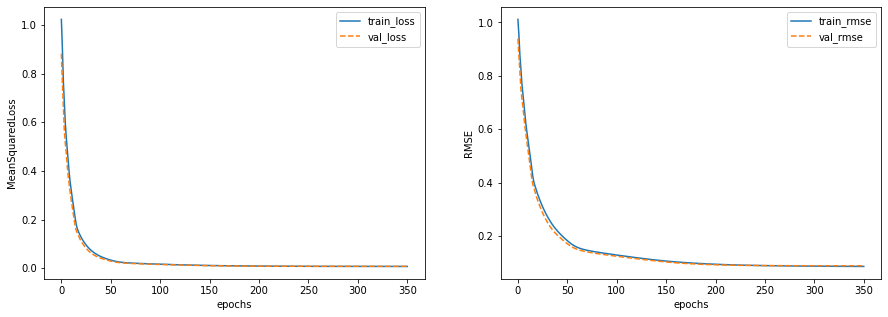

In [25]:
# plot epoch vs loss, epoch vs RMSE
plt.figure(figsize=(15,5))

epochs = len(model_history.history['loss'])

plt.subplot(1,2,1)
plt.plot(np.arange(0,epochs,1), model_history.history['loss'], '-', label='train_loss')
plt.plot(np.arange(0,epochs,1), model_history.history['val_loss'], '--', label='val_loss', )
plt.xlabel('epochs')
plt.ylabel('MeanSquaredLoss')
#plt.title('epoch vs loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(np.arange(0,epochs,1), model_history.history['root_mean_squared_error'], '-', label='train_rmse')
plt.plot(np.arange(0,epochs,1), model_history.history['val_root_mean_squared_error'], '--', label='val_rmse')
plt.xlabel('epochs')
plt.ylabel('RMSE')
#plt.title('epoch vs RMSE')
plt.legend()
plt.savefig(os.path.join(out_dir,'05_epoch_vs_loss.pdf'))
plt.show()

In [26]:
#model.evaluate(test_dataset)

# Sample Reconstruction

In [27]:
# Reconstruct 
z_reconstruct = np.linspace(0,8.5,212)[::-1]
z_reconstruct = np.expand_dims(strided_app(z_reconstruct, window_size, 1), axis=-1)

In [28]:
mu_reconstruct = model.predict(z_reconstruct, batch_size=BATCH_SIZE)
mu_reconstruct = mu_scaler.inverse_transform(mu_reconstruct.reshape(-1,4))

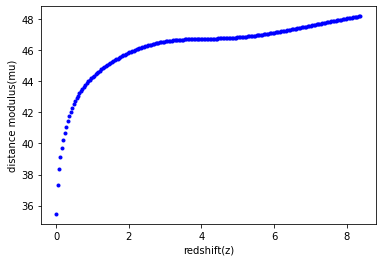

In [29]:
# plot reconstructed z vs mu
plt.plot(z_reconstruct[:,-1].flatten(), mu_reconstruct[:,-1].flatten(), '.',color='b');
plt.xlabel('redshift(z)')
plt.ylabel('distance modulus(mu)')
#plt.title('Distance modulus vs redshift')
plt.savefig(os.path.join(out_dir,'06_sample_reconstruction.pdf'))
plt.show()

# Sample Reconstruction with uncertainity

In [30]:
model_u = model_uncertainity()

In [31]:
model_u.load_weights(os.path.join(out_dir,'cp.ckpt'))

In [32]:
model_u.compile(optimizer=tf.keras.optimizers.Adam(1e-3), loss=tf.keras.losses.MeanSquaredError(), metrics=tf.keras.metrics.RootMeanSquaredError())

In [33]:
mu_reconstruct_uncertainity = []
n = 1000
for i in range(n):
    y_pred = model_u.predict(z_reconstruct, batch_size=500)[:,-1].flatten()
    y_pred = mu_scaler.inverse_transform(y_pred.reshape(-1,1))
    mu_reconstruct_uncertainity.append(y_pred)

In [34]:
mu_reconstruct_uncertainity = np.array(mu_reconstruct_uncertainity)
mean = np.mean(mu_reconstruct_uncertainity, axis=0).flatten()
std_dev = np.std(mu_reconstruct_uncertainity, axis=0).flatten()

In [35]:
# z_reconstruct = z_scaler.inverse_transform(z_reconstruct[:,-1]) 

/tmp/ipykernel_178825/344823818.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ".r" (-> color='r'). The keyword argument will take precedence.
  plt.errorbar(df_SNe['zCMB'], df_SNe['MU'], yerr=df_SNe['MUERR'], fmt='.r', label=dataset+' Sample', color='r');


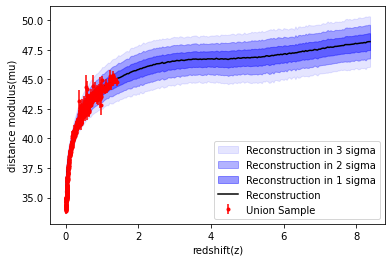

In [36]:
#plt.figure(figsize=(10,7))
plt.fill_between(
    z_reconstruct[:,-1].flatten(), 
    mean-3*std_dev, mean+3*std_dev,
    label='Reconstruction in 3 sigma',color='b', alpha=0.1)
plt.fill_between(
    z_reconstruct[:,-1].flatten(), 
    mean-2*std_dev, mean+2*std_dev,
    label='Reconstruction in 2 sigma',color='b', alpha=0.3)
plt.fill_between(
    z_reconstruct[:,-1].flatten(), 
    mean-1*std_dev, mean+1*std_dev,
    label='Reconstruction in 1 sigma', color='b', alpha=0.4)

plt.plot(z_reconstruct[:,-1].flatten(), mean, label='Reconstruction', color='k')
plt.errorbar(df_SNe['zCMB'], df_SNe['MU'], yerr=df_SNe['MUERR'], fmt='.r', label=dataset+' Sample', color='r');
plt.xlabel('redshift(z)')
plt.ylabel('distance modulus(mu)')
#plt.title('The reconstruction of distance moduli from '+dataset+' data ')
plt.legend()
plt.savefig(os.path.join(out_dir,'07_sample_reconstruction_with_uncertainity.pdf'))
plt.show()